In [16]:
import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt

data = pd.read_csv('ObesityDataSet_raw_and_data_sinthetic.csv')
print(data.sample(5))

      Gender        Age    Height      Weight family_history_with_overweight  \
742     Male  18.000000  1.719827   52.289828                            yes   
1149    Male  17.689057  1.713599   83.285753                            yes   
1689    Male  25.062942  1.828391  120.998266                            yes   
514   Female  22.142432  1.596110   42.848033                             no   
2022  Female  25.976209  1.614484  104.999403                            yes   

     FAVC      FCVC       NCP        CAEC SMOKE      CH2O SCC       FAF  \
742   yes  1.202075  3.000000   Sometimes    no  1.927976  no  0.023574   
1149  yes  2.009952  2.716106   Sometimes    no  1.660614  no  1.000000   
1689  yes  3.000000  3.000000   Sometimes    no  3.000000  no  1.685369   
514    no  3.000000  2.581015  Frequently    no  2.654702  no  0.902095   
2022  yes  3.000000  3.000000   Sometimes    no  1.237557  no  0.083675   

           TUE       CALC                 MTRANS           NObeyesda

In [3]:
# Check for missing values
print(data.isnull().sum())

# Fill or drop missing values
data = data.dropna()

# Detecting outliers can be done using various methods (e.g., Z-score, IQR method)


Gender                            0
Age                               0
Height                            0
Weight                            0
family_history_with_overweight    0
FAVC                              0
FCVC                              0
NCP                               0
CAEC                              0
SMOKE                             0
CH2O                              0
SCC                               0
FAF                               0
TUE                               0
CALC                              0
MTRANS                            0
NObeyesdad                        0
dtype: int64


In [5]:
from sklearn.preprocessing import StandardScaler

continuous_features = ['Age', 'Height', 'Weight', 'NCP', 'CH2O', 'FAF', 'TUE']
scaler = StandardScaler()
data[continuous_features] = scaler.fit_transform(data[continuous_features])


In [11]:
print(data.dtypes)

Age                                   float64
Height                                float64
Weight                                float64
FCVC                                  float64
NCP                                   float64
CH2O                                  float64
FAF                                   float64
TUE                                   float64
Gender_Male                              bool
family_history_with_overweight_yes       bool
FAVC_yes                                 bool
CAEC_Frequently                          bool
CAEC_Sometimes                           bool
CAEC_no                                  bool
SMOKE_yes                                bool
SCC_yes                                  bool
CALC_Frequently                          bool
CALC_Sometimes                           bool
CALC_no                                  bool
MTRANS_Bike                              bool
MTRANS_Motorbike                         bool
MTRANS_Public_Transportation      

In [6]:
categorical_features = ['Gender', 'family_history_with_overweight', 'FAVC', 'CAEC', 'SMOKE', 'SCC', 'CALC', 'MTRANS', 'NObeyesdad']
data = pd.get_dummies(data, columns=categorical_features, drop_first=True)


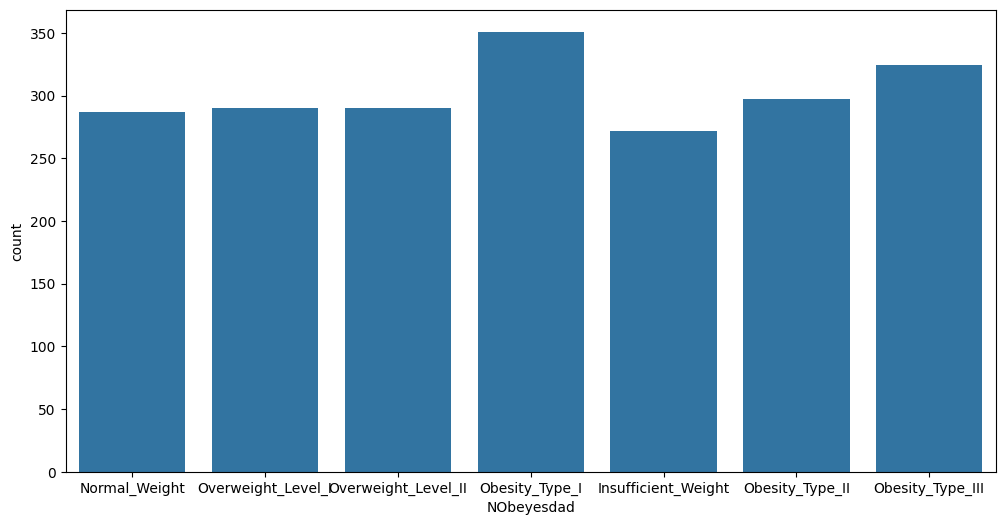

In [17]:


target_column = 'NObeyesdad'  

data = data.dropna()
plt.figure(figsize=(12, 6))
sns.countplot(x="NObeyesdad", data=data)
plt.show()



In [18]:
sns.heatmap(data.corr(), annot=True, cmap='coolwarm')
plt.show()

ValueError: could not convert string to float: 'Female'

In [21]:
# Feature Engineering
from sklearn.ensemble import RandomForestClassifier


X = data.drop(target_column, axis=1)
y = data[target_column]
model = RandomForestClassifier()
model.fit(X, y)
feature_importances = pd.Series(model.feature_importances_, index=X.columns)
feature_importances.nlargest(10).plot(kind='barh')
plt.show()

ValueError: could not convert string to float: 'Female'